<div class='alert-block alert-info'>
    <br>
    <h1 align="center"><b>  Lab session 5 :</b> Reinforcement Learning: Dynamic Programming </h1>
    <h3 align="center">Artificial Intelligence Algorithms </h3>
    <h5 align="center">MESIIN476024</a></h5>
    <br>
</div>

## 
##  **Jeremie FORMEY DE SAINT LOUVENT, DIA 3**
##  **Camille DUPRE-LA-TOUR, DIA 2**

#### **Session Outline:**
This session is structured into two distinct parts:

1.	**MDP-RL Focus (1.5 hours):** Dive into key concepts and applications of Markov Decision Processes and Reinforcement Learning.
2.	**Project Work (1.5 hours):** The second half will be dedicated to making progress on the ongoing project.  Final lab session will be dedicated to project presentations.

# <h1 align="left"> <font color='darkblue'><b> A. MDP-RL Focus </b></font></a></h1>  

This tutorial introduces the foundational concepts and practical implementation of Markov Decision Processes (MDPs) and Reinforcement Learning (RL), leveraging **OpenAI Gym** to build hands-on experience. This part is divided into multiple sections to progressively explore the topic, culminating in practical exercises to solidify understanding.




## <h2 align="left"> <font color='darkblue'><b> 1. Introduction to Gymnasium API </b></font></a></h2>  

Gymnasium, a maintained fork of OpenAI Gym ([https://gymnasium.farama.org](https://gymnasium.farama.org)), is a Python library designed to provide a diverse collection of environments for reinforcement learning (RL) experiments through a unified interface. The central concept in Gymnasium is the **environment** (`Env` class), which encapsulates the functionality and capabilities required for RL tasks.

---

<h3 align="left"> <b> a. Key Features of Gymnasium Environments </b></h3>  

Every Gymnasium environment provides the following key pieces of information and functionality:

- **Action Space:** Defines the set of allowable actions that an agent can take. Gymnasium supports:
  - **Discrete actions** (e.g., selecting from a finite number of options).
  - **Continuous actions** (e.g., choosing a value within a range).
  - **Combined spaces** for more complex setups.

- **Observation Space:** Describes the shape and boundaries of the information (state) provided to the agent about the environment.

- **Methods:**
  - `step(action)`: Executes an action in the environment and returns:
    - The current **observation** (new state).
    - The **reward** for the action taken.
    - A **terminated** flag indicating if the episode has ended successfully.
    - A **truncated** flag indicating if the episode ended due to a time limit or other criteria.
    - An **info** dictionary containing additional information (optional).
  - `reset()`: Resets the environment to its initial state and returns the first observation along with additional **info**.

- **Environment Naming Convention:**  
  Each Gymnasium environment has a unique name following the `EnvironmentName-vX` format, where `X` denotes the version number. Versions distinguish between updates or modifications in the environment, such as bug fixes or significant changes.

- For more details, refer to the documentation website at [gymnasium.farama.org](https://gymnasium.farama.org) or the package information on  [pypi.org/project/gymnasium](https://pypi.org/project/gymnasium).
---

<h3 align="left"> <b> b. Creating an Environment </b></h3>  

To create an environment, Gymnasium provides the `make(env_name)` function, which takes the environment’s name as a string. For example:


In [60]:
'''Make sure that Gymnasium is already installed, or install it using the following command:'''

!pip install gymnasium

In [61]:
import gymnasium as gym

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=True)


Let's look at the frozen lake environment using the render function and matplotlib library:

Initial frame


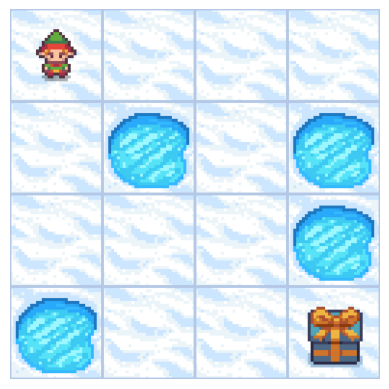

In [62]:

import matplotlib.pyplot as plt

# Reset the environment to its initial state
observation, info = env.reset()

# Function to display the rendered frame
def display_frame(env):
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    plt.show()

# Display the initial frame
print("Initial frame")
display_frame(env)


As we can see, our agent starts in cell $(0, 0)$, and its goal is to reach cell $(3, 3)$ while avoiding the hole cells scattered across the grid. In the next section, we will explore in more detail the various components of a Gymnasium environment and the information it contains.

To get an overview of the different environments available in Gymnasium and explore one of them, you can use the following code. It retrieves and lists all the available environments in the Gymnasium library, along with the total number of environments currently supported.

In [63]:
from gymnasium import envs

# Get all environments and count them
all_envs = envs.registry.keys()
num_envs = len(all_envs)

print("Number of environments:", num_envs)


# Retrieve all environment names
all_envs = gym.envs.registry.keys()
print("----")
# Print each environment name
for env_name in all_envs:
    print(env_name)

Number of environments: 62
----
CartPole-v0
CartPole-v1
MountainCar-v0
MountainCarContinuous-v0
Pendulum-v1
Acrobot-v1
phys2d/CartPole-v0
phys2d/CartPole-v1
phys2d/Pendulum-v0
LunarLander-v3
LunarLanderContinuous-v3
BipedalWalker-v3
BipedalWalkerHardcore-v3
CarRacing-v3
Blackjack-v1
FrozenLake-v1
FrozenLake8x8-v1
CliffWalking-v0
Taxi-v3
tabular/Blackjack-v0
tabular/CliffWalking-v0
Reacher-v2
Reacher-v4
Reacher-v5
Pusher-v2
Pusher-v4
Pusher-v5
InvertedPendulum-v2
InvertedPendulum-v4
InvertedPendulum-v5
InvertedDoublePendulum-v2
InvertedDoublePendulum-v4
InvertedDoublePendulum-v5
HalfCheetah-v2
HalfCheetah-v3
HalfCheetah-v4
HalfCheetah-v5
Hopper-v2
Hopper-v3
Hopper-v4
Hopper-v5
Swimmer-v2
Swimmer-v3
Swimmer-v4
Swimmer-v5
Walker2d-v2
Walker2d-v3
Walker2d-v4
Walker2d-v5
Ant-v2
Ant-v3
Ant-v4
Ant-v5
Humanoid-v2
Humanoid-v3
Humanoid-v4
Humanoid-v5
HumanoidStandup-v2
HumanoidStandup-v4
HumanoidStandup-v5
GymV21Environment-v0
GymV26Environment-v0


## <h2 align="left"> <font color='darkblue'><b> 2. Understanding and Exploring the FrozenLake-v1 Environment  </b></font></h2>  

The **FrozenLake-v1** environment is a classic reinforcement learning task where an agent must navigate across a frozen grid to reach a goal. The grid world contains several types of terrain that affect the agent's movement and rewards.

![FrozenLake Example Layout](images/Frozen_Lake.png)



In [64]:
import gymnasium as gym
# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array")


<h3 align="left"> <b> a. Grid Description</b></h3>  
The environment consists of a grid (visible in the figure), with the following cell types:
- **Start (S)**: The agent starts at cell \((0, 0)\).
- **Frozen (F)**: Safe cells where the agent can move freely without penalty.
- **Hole (H)**: Dangerous cells; if the agent steps here, the episode ends with zero reward.
- **Goal (G)**: The treasure cell; reaching this cell ends the episode with a positive reward.

The agent's objective is to navigate from the **Start** to the **Goal** while avoiding the **Holes**. The environment's layout is defined by an $n \times n$ grid, which can vary in size depending on the specific configuration. For a **4x4 FrozenLake grid**, the state indices are as follows:

|       | **0**  | **1**  | **2**  | **3**  |
|-------|--------|--------|--------|--------|
| **0** | 0  | 1  | 2  | 3  |
| **1** | 4  | 5  | 6  | 7  |
| **2** | 8  | 9  | 10 | 11 |
| **3** | 12 | 13 | 14 | 15 |


In [65]:
import gymnasium as gym

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)


# Get the total number of states
num_states = env.observation_space.n # Discrete(16) (4x4 grid)

# Display the set of states
layout = env.unwrapped.desc
print("State Mapping with Grid Layout:")
for i, row in enumerate(layout):
    mapped_row = [f"{cell.decode('utf-8')}({i*4+j})" for j, cell in enumerate(row)]
    print(" ".join(mapped_row))

# Close the environment
env.close()

State Mapping with Grid Layout:
S(0) F(1) F(2) F(3)
F(4) H(5) F(6) H(7)
F(8) F(9) F(10) H(11)
H(12) F(13) F(14) G(15)


**Evironment Layout:**

``` python
    S F F F
    F H F H
    F F F H
    H F F G

In [66]:
import gymnasium as gym

# Create the FrozenLake environment
env = gym.make("FrozenLake-v1", is_slippery=True)

# Access the layout of the environment
layout = env.unwrapped.desc

# Print the layout
print("FrozenLake Layout:")
for row in layout:
    print(" ".join(cell.decode("utf-8") for cell in row))  # Decode bytes to strings

# Close the environment
env.close()

FrozenLake Layout:
S F F F
F H F H
F F F H
H F F G


---
<h3 align="left"> <b> b. Set of Actions</b></h3>

The agent in the environment has four possible moves — Up, Down, Left and Right.
  - **0**: Move **left**  <-.
  - **1**: Move **down**  ↓.
  - **2**: Move **right**  ->.
  - **3**: Move **up**  ↑.


Action Space: Discrete(4)
Performed action: ← (0)


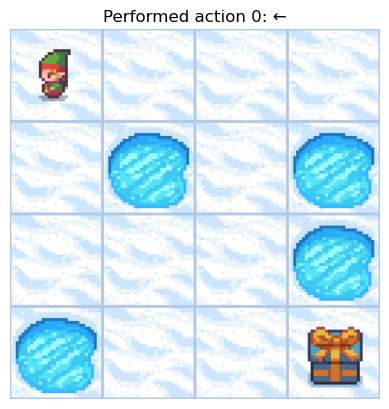

Performed action: ↓ (1)


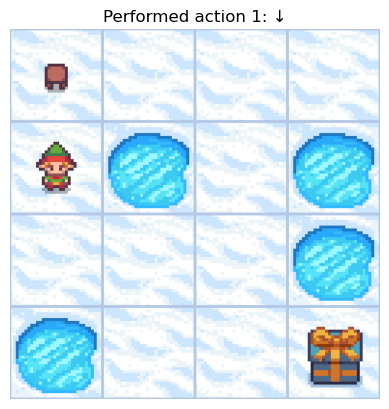

Performed action: → (2)


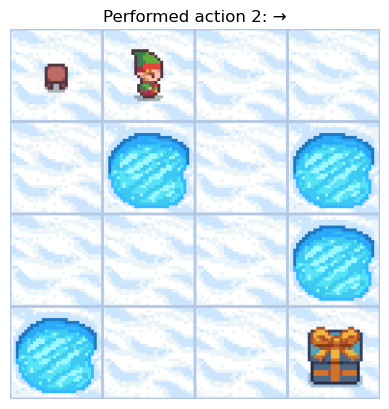

Performed action: ↑ (3)


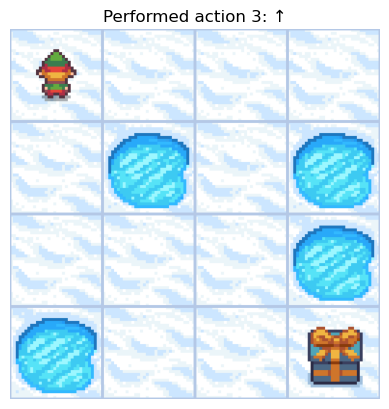

In [67]:
import gymnasium as gym
import matplotlib.pyplot as plt

# Action Space:
print("Action Space:", env.action_space)

# Map actions to directions
actions_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}

# Create the FrozenLake-v1 environment with rendering enabled
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=False)

# Reset the environment to its initial state


# Function to display the rendered frame
def display_frame(env, action=None):
    frame = env.render()  # Get the RGB array of the current frame
    plt.imshow(frame)
    plt.axis("off")  # Hide axes for better visualization
    if action is not None:
        plt.title(f"Performed action {action}: {actions_map[action]}")  # Display the action
    plt.show()

# Take each possible action in the environment and display the result
for action in range(4):
    observation, info = env.reset()
    print(f"Performed action: {actions_map[action]} ({action})")  # Display action number and description
    observation, reward, terminated, truncated, info = env.step(action)  # Take the action
    display_frame(env, action)  # Display the rendered frame
# Close the environment
env.close()

---
<h3 align="left"> <b> c. Stochastic Action Dynamics</b></h3>

The **FrozenLake** environment introduces stochasticity to simulate the slippery nature of ice.  The agent's actions do not always result in the expected movement. Instead, the transitions are probabilistic:

- $P(0.333)$: The agent moves in the intended direction.
- $P(0.333)$: The agent moves at a 90° angle to the intended direction (either left or right).
- $P(0.333)$: The agent moves in the opposite direction.

This behavior makes navigation challenging, as the agent must account for the inherent uncertainty in its actions.


**Example:**

The following diagram illustrates the stochastic dynamics:

<div style="text-align: center;">
    <img src="images/Stochastic_Dynamics.png" width="400" />
</div>

- From **state 6**, when taking **action 0** (move left):
  - There is a **0.33 probability** of transitioning to **state 2**, with a reward of **0.0**. The transition is **non-terminal**.
  - There is a **0.33 probability** of transitioning to **state 5**, with a reward of **0.0**. The transition is **terminal**, and the MDP ends.
  - There is a **0.33 probability** of transitioning to **state 10**, with a reward of **0.0**. The transition is **non-terminal**.



This stochastic behavior increases the complexity of the environment, as the agent cannot always predict its exact position after an action. Consequently, it requires the agent to develop a robust and adaptable policy that considers the probabilities of all possible outcomes and maximize its chances of reaching the goal while minimizing the risks of falling into a hole.

In [68]:
# Create FrozenLake environment with custom grid
env = gym.make("FrozenLake-v1", is_slippery=True)


**Note on Dynamics (`is_slippery`)**

1.	**is_slippery=True:**
    - Actions are stochastic, meaning the agent might slip into an unintended cell.
	- Adds complexity and randomness to the environment.
2.	**is_slippery=False:**
	- Actions are deterministic, and the agent moves exactly as intended.

In [69]:
# Access the raw environment object
raw_env = env.unwrapped

for prob, next_state, reward, done in raw_env.P[0][1]:  # Example: State 0, Action 1
    print(f"Transition Probability[{0}][{next_state}]: {prob}")

Transition Probability[0][0]: 0.3333333333333333
Transition Probability[0][4]: 0.3333333333333333
Transition Probability[0][1]: 0.3333333333333333


---
<h3 align="left"> <b> d. Reward System</b></h3>

The reward system in **FrozenLake** is sparse:
- **0** for each step, regardless of the type of cell (no penalty for frozen cells or movement through the grid).
- **0** for falling into a hole (**H**), ending the episode immediately.
- **1** for reaching the goal (**G**), ending the episode successfully.

This sparse reward structure forces the agent to optimize its policy by learning from successful attempts to reach the goal.

In [70]:
state = 14  # Example current state
rewards = {}

for action in raw_env.P[state]:
    rewards[action] = []
    for prob, next_state, reward, done in raw_env.P[state][action]:
        rewards[action].append((next_state, reward))  # Include next_state index

print(f"Rewards for state {state}:")
for action, transitions in rewards.items():
    print(f"  Action {action}:")
    for next_state, reward in transitions:
        print(f"    Next State: {next_state}, Reward: {reward}")

Rewards for state 14:
  Action 0:
    Next State: 10, Reward: 0.0
    Next State: 13, Reward: 0.0
    Next State: 14, Reward: 0.0
  Action 1:
    Next State: 13, Reward: 0.0
    Next State: 14, Reward: 0.0
    Next State: 15, Reward: 1.0
  Action 2:
    Next State: 14, Reward: 0.0
    Next State: 15, Reward: 1.0
    Next State: 10, Reward: 0.0
  Action 3:
    Next State: 15, Reward: 1.0
    Next State: 10, Reward: 0.0
    Next State: 13, Reward: 0.0


### <h3 style="color: darkred;"><b>Exercice1: Your Turn to Explore</b></h3>

Now, it's up to you to explore the **FrozenLake** environment and extract meaningful insights by writing code snippets. Use the following questions as a guide to analyze and understand the dynamics of the environment.

1. **Initial State**: Display the initial state of the environment. Understand where the agent starts on the grid and how it maps to the state space.

2. **Next States**: Retrieve and examine the possible next states after taking a specific action in a given state. For example, explore how actions like `←`, `↓`, `→`, and `↑` affect the agent's position on the grid.

3. **Episode Termination (`done`)**: Determine whether an episode ends after a particular state transition. This will help identify terminal states, such as falling into a hole or reaching the goal.

4. **Episode Information**: Extract and track details about the current episode, including:
	-	Cumulative rewards.
	-	Total steps taken.
	-	Whether the episode was completed successfully or terminated early.

5. **Random/Greedy Policy**: Implement a random or greedy policy (e.g., always move right), and observe its performance.
6. **Close the environment**: Ensure the environment is closed properly after your exploration to release resources.

For more details, refer to the table below and revisit the links to the **Gymnasium documentation** mentioned at the beginning of this notebook. These resources provide additional context, explanations, and examples to support your exploration and understanding.

In [71]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array",  is_slippery=True)

1. Initial state

Initial observation (state): 0
Agent starts at state: 0


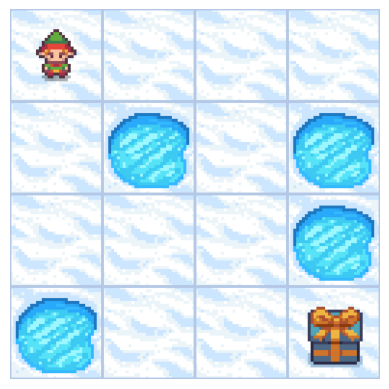

In [72]:
initial_observation, info = env.reset()
print("Initial observation (state):", initial_observation)
print("Agent starts at state:", initial_observation)
display_frame(env)

2. Next States

Lets try this : from the initial state, see the transitions for action 'down' (action=1)


In [73]:
state = 0
action = 1
transitions = raw_env.P[state][action]

print(f"\nTransitions from state {state} using action {action} ({actions_map[action]}):")
for (prob, next_state, reward, done) in transitions:
    print(f"  - Next State={next_state}, Probability={prob:.2f}, Reward={reward}, Done={done}")


Transitions from state 0 using action 1 (↓):
  - Next State=0, Probability=0.33, Reward=0.0, Done=False
  - Next State=4, Probability=0.33, Reward=0.0, Done=False
  - Next State=1, Probability=0.33, Reward=0.0, Done=False


3. Episode Termination

Let's do a quick run of a random policy and see how and when the episode terminates

In [74]:
done = False
observation, info = env.reset()
episode_rewards = 0
steps = 0

print("\nRunning a random policy for one episode...")
while not done:
    # Take random action
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)
    episode_rewards += reward
    steps += 1
    if done or truncated:
        print(f"Episode terminated at state {observation}, total reward={episode_rewards}, steps={steps}")
        break


Running a random policy for one episode...
Episode terminated at state 5, total reward=0.0, steps=8


4. Episode Information

In [75]:
# 5. Greedy policy example: always move right (action=2)
env.reset()
done = False
observation, info = env.reset()
episode_rewards = 0
steps = 0
print("\nRunning a greedy policy (always move right) for one episode...")
while not done:
    action = 2  # always move right
    observation, reward, done, truncated, info = env.step(action)
    episode_rewards += reward
    steps += 1
    if done or truncated:
        print(f"Episode ended at state {observation}, total reward={episode_rewards}, steps={steps}")
        break


Running a greedy policy (always move right) for one episode...
Episode ended at state 11, total reward=0.0, steps=13


6. Close the environment

In [76]:
env.close()

**Summary of Retrievable Information**

| **Data**                   | **How to Retrieve**                | **Usage**                                   |
|----------------------------|-------------------------------------|--------------------------------------------|
| **State Space**            | `env.observation_space`            | Understand the environment's size.         |
| **Action Space**           | `env.action_space`                 | Know the set of possible actions.          |
| **Transition Probabilities** | `raw_env.P`                      | Analyze stochastic dynamics.               |
| **Rewards**                | `raw_env.P`                        | Understand reward structure.               |
| **Episode Termination (`done`)** | `raw_env.P`                   | Identify terminal states.                  |
| **Grid Layout**            | `raw_env.desc`                     | Visualize the environment.                 |
| **Initial State**          | `env.reset()`                      | Observe the agent's starting position.     |
| **Rendering**              | `env.render()`                     | Debug and visualize agent behavior.        |
| **Episode Information**    | `env.step(action)` (returns `info`) | Monitor performance during an episode.     |

## <h2 align="left"> <font color='darkblue'><b> 3. Compute Optimal Policy </b></font></h2>  


The <b>FrozenLake-v1</b> environment presents a challenging grid-based problem where the agent must navigate from the start position to the goal while avoiding holes. This task becomes significantly more complex under stochastic dynamics (<code>is_slippery=True</code>), where the agent's actions may not always result in the intended movement. Instead, the environment introduces randomness, causing the agent to "slip" and move in unintended directions, making planning and decision-making critical.


---

<h3 align="left"> <font color='darkred'><b> Exercice 2: Implement Value Iteration Algorithm </b></font></h3>  

Value Iteration is a fundamental reinforcement learning algorithm used to compute the optimal policy for an environment. It works by iteratively updating the value function for each state based on the expected rewards and the dynamics of the environment. In the case of **FrozenLake-v1** with stochastic dynamics, Value Iteration must account for the uncertainty in transitions, ensuring that the computed policy balances the risks of slipping with the rewards of reaching the goal.



<div style="text-align: center;">
    <img src="images/Value_Iteration.png" width="600" />
</div>

The diagram above illustrates the process of Value Iteration, where the agent evaluates the value of each state iteratively until convergence. The resulting optimal policy guides the agent through the environment, avoiding hazards and maximizing its chances of success despite the stochastic dynamics.

<font color='darkred'><b>Your tasks are:</b></font>
<ol>
    <li>Implement the <b>Value Iteration algorithm</b>. Run the algorithm to obtain the optimal policy for the <b>FrozenLake-v1</b> stochastic environment. How many iterations does the policy need to converge?</li>
    <li>Use the code below to visualize the agent's steps as it navigates the environment based on the derived optimal policy.</li>
    <li>Observe and analyze the agent's performance under deterministic dynamics (<b>is_slippery=False</b>).</li>
</ol>

In [77]:
# Your code
import gymnasium as gym
import numpy as np

def value_iteration(env, gamma=0.99, theta=1e-4):
    """
    Performs Value Iteration for a discrete MDP environment.
    Returns the optimal value function and optimal policy.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    P = env.unwrapped.P  # transition probabilities

    # 1. Initialize V(s)
    V = np.zeros(n_states)

    while True:
        delta = 0
        # 2. For each state:
        for s in range(n_states):
            v = V[s]
            # Evaluate all possible actions
            action_values = []
            for a in range(n_actions):
                transitions = P[s][a]  # list of (prob, next_state, reward, done)
                q_val = 0
                for (prob, next_s, reward, done) in transitions:
                    q_val += prob * (reward + gamma * V[next_s])
                action_values.append(q_val)
            # update V[s] with the best action's q_val
            V[s] = max(action_values)

            # track max difference for convergence
            delta = max(delta, abs(v - V[s]))
        # check if converged
        if delta < theta:
            break

    # Derive policy from value function
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        action_values = []
        for a in range(n_actions):
            transitions = P[s][a]
            q_val = 0
            for (prob, next_s, reward, done) in transitions:
                q_val += prob * (reward + gamma * V[next_s])
            action_values.append(q_val)
        policy[s] = np.argmax(action_values)

    return V, policy


# Run Value Iteration on the FrozenLake environment
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False) # We set is_slippery = false to avoid the slidings
V_star, optimal_policy = value_iteration(env)
env.close()

print("Optimal Value Function (first few states):")
print(np.round(V_star[:16],6).reshape(4, 4))
print("\nDerived Optimal Policy:")
print(optimal_policy.reshape((4,4)))  


Optimal Value Function (first few states):
[[0.95099  0.960596 0.970299 0.960596]
 [0.960596 0.       0.9801   0.      ]
 [0.970299 0.9801   0.99     0.      ]
 [0.       0.99     1.       0.      ]]

Derived Optimal Policy:
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]


As we can see, the policy is quite deterministic. In fact, each value is either close to 1 or 0. There are two different situations where the values are equal for both paths (0 -> 1, right or 0 -> 4, down and 9 -> 10, right or 9 -> 13, down). Even though the values are the same, the policy chooses down (state 1 for both positions) because it is evaluated first in our order (1 is down and 2 is right), so down is prioritized here.


Simulating the agent's steps:


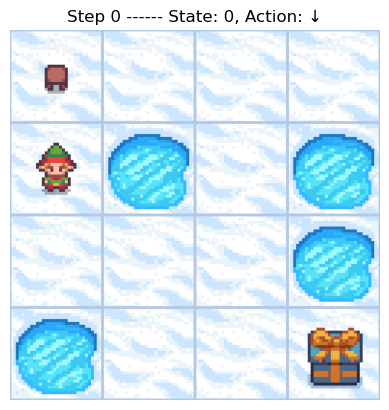

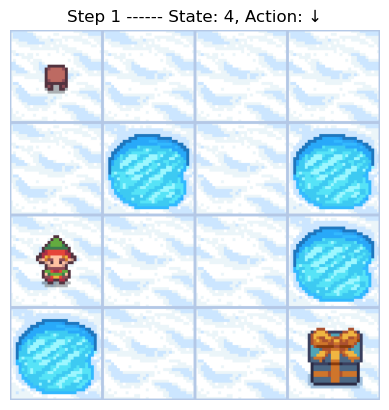

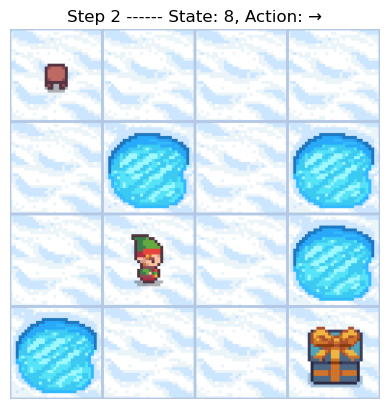

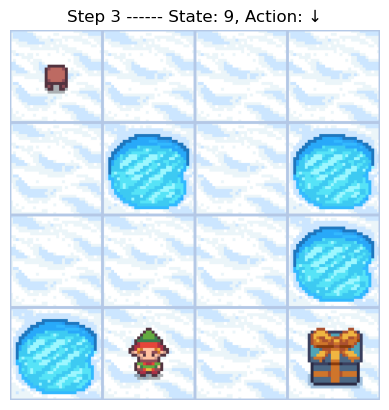

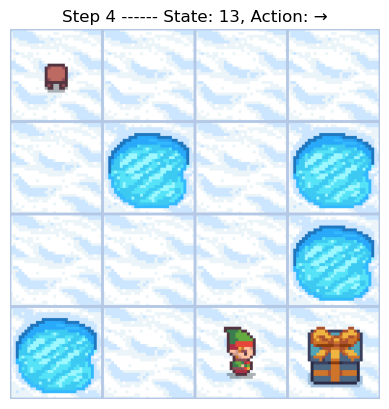

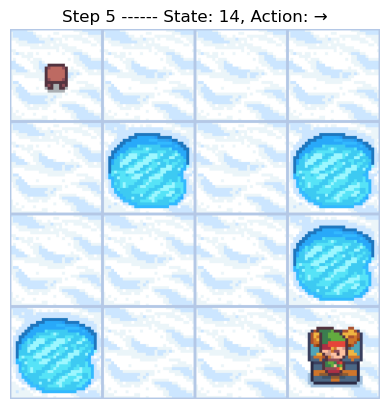


Final State: 15, Reward: 1.0
Number of steps used: 6


In [78]:
# Visualization: Simulate the environment using the derived policy
state = env.reset()[0]
done = False

print("\nSimulating the agent's steps:")
steps = 0
while not done:
    # Take the action based on the optimal policy
    action = optimal_policy[state]
    new_state, reward, done, _, _ = env.step(action)

    # Render the environment and display steps
    img = env.render()
    plt.imshow(img)

    plt.title(f"Step {steps} ------ State: {state}, Action: {actions_map[action]}")
    plt.axis('off')
    plt.show()

    # Transition to the new state
    state = new_state
    steps = steps + 1

# Final reward and state
print(f"\nFinal State: {state}, Reward: {reward}")
print(f"Number of steps used: {steps}")
env.close()

Here, our policy is well respected, and the performance seems to be the best possible with these parameters.

 ---

### <h3 align="left"> <font color='darkred'><b> Exercice 3: Implement Policy Iteration Algorithm </b></font></h3>  

<p>
The <b>Policy Iteration</b> algorithm is an iterative approach used to compute the optimal policy for a Markov Decision Process (MDP). It alternates between two steps:
</p>

<ul>
    <li><b>Policy Evaluation</b>: Computes the value function for a fixed policy by iteratively updating state values.</li>
    <li><b>Policy Improvement</b>: Updates the policy by selecting the action that maximizes the expected value for each state.</li>
</ul>

<p>
This process continues until the policy becomes stable, meaning further iterations do not result in any changes.
</p>

<div style="text-align: center;">
    <img src="images/Policy_Iteration_.png" width="400" />
</div>

<p>
The diagram above illustrates the iterative nature of Policy Iteration, combining evaluation and improvement steps to converge to the optimal policy.
</p>

<font color='darkred'><b>Your tasks are:</b>
<ol>
    <li>Implement the <b>Policy Iteration algorithm</b> as a function. Run the algorithm to obtain the optimal policy for the <b>FrozenLake-v1</b> stochastic environment. How many iterations does the policy need to converge?</li>
</ol>
</font>


Policy Iteration alternates between:

* Policy Evaluation: Given a policy, compute its value function.
* Policy Improvement: Use the value function to greedily improve the policy.
* We repeat until the policy is stable.

First we create a function to evaluate the value function for a given policy using iterative evaluation.


In [79]:
def policy_evaluation(env, policy, V, gamma=0.99, theta=1e-4):
    """
    Evaluate the value function for a given policy using iterative evaluation.
    """
    P = env.unwrapped.P
    n_states = env.observation_space.n

    while True:
        delta = 0
        for s in range(n_states):
            v = V[s]
            a = policy[s]
            # Evaluate Q(s,a)
            new_v = 0
            for (prob, next_s, reward, done) in P[s][a]:
                new_v += prob * (reward + gamma * V[next_s])
            V[s] = new_v
            delta = max(delta, abs(v - new_v))
        if delta < theta:
            break
    return V

We create a function : given a state-value function V, update the policy greedily.

In [80]:
def policy_improvement(env, V, policy, gamma=0.99):
    """
    Given a state-value function V, update the policy greedily.
    """
    P = env.unwrapped.P
    n_states = env.observation_space.n
    n_actions = env.action_space.n
    policy_stable = True

    for s in range(n_states):
        old_action = policy[s]

        # Compute the best action given V
        action_values = []
        for a in range(n_actions):
            q_val = 0
            for (prob, next_s, reward, done) in P[s][a]:
                q_val += prob * (reward + gamma * V[next_s])
            action_values.append(q_val)
        best_action = np.argmax(action_values)

        policy[s] = best_action
        if best_action != old_action:
            policy_stable = False

    return policy, policy_stable

We create a third function policy iteration

In [81]:
def policy_iteration(env, gamma=0.99, theta=1e-4):
    """
    Policy Iteration to find the optimal policy and value function.
    Returns the optimal value function, optimal policy, and the number of iterations.
    """
    n_states = env.observation_space.n
    n_actions = env.action_space.n

    # Initialize a random policy
    policy = np.random.randint(0, n_actions, size=n_states)
    V = np.zeros(n_states)

    iteration_count = 0  # Initialize iteration counter

    while True:
        iteration_count += 1  # Increment the iteration count

        # 1. Policy Evaluation
        V = policy_evaluation(env, policy, V, gamma=gamma, theta=theta)
        # 2. Policy Improvement
        policy, stable = policy_improvement(env, V, policy, gamma=gamma)
        if stable:
            break

    return V, policy, iteration_count

We run Policy Iteration on the FrozenLake environment


In [82]:
env = gym.make("FrozenLake-v1", render_mode="rgb_array", is_slippery=False)

V_pi, policy_pi, iterations = policy_iteration(env)
env.close()

print("Policy Iteration => Optimal Value Function (first few states):")
print(np.round(V_pi[:16], 6).reshape(4, 4))
print("\nDerived Policy (4x4):")
print(policy_pi.reshape((4,4)))
print("")
print(f"Number of iterations to converge: {iterations}")


Policy Iteration => Optimal Value Function (first few states):
[[0.95099  0.960596 0.970299 0.960596]
 [0.960596 0.       0.9801   0.      ]
 [0.970299 0.9801   0.99     0.      ]
 [0.       0.99     1.       0.      ]]

Derived Policy (4x4):
[[1 2 1 0]
 [1 0 1 0]
 [2 1 1 0]
 [0 2 2 0]]

Number of iterations to converge: 6


As we can see, the value function and the policy are the same as in our Value Iteration Algorithm. We obtained this result after **6 iterations**, which can be considered quite fast, but it is not that surprising considering the simplicity of the problem and the basic constraints involved.

### <h3 align="left"> <font color='darkred'><b> Exercise 4: Implement Q-Learning Algorithm </b></font></h3>  

<p>
Q-Learning is an off-policy reinforcement learning algorithm that estimates <b>Q-values</b>  (state-action values) to derive an optimal policy. The algorithm balances exploration (discovering new actions) and exploitation (choosing the best-known actions) through the use of an epsilon-greedy policy.
</p>

<div style="text-align: center;">
    <img src="images/Q_Learning.png" width="600" />
</div>


<p>
In this exercise, you will implement the <b>Q-Learning algorithm</b> for the <b>FrozenLake-v1</b> environment, which involves stochastic dynamics (<code>is_slippery=True</code>). Your goal is to enable the agent to learn the optimal policy over episodes while balancing exploration and exploitation.
</p>

<p>
Some key concepts related to this algorithm have been discussed in the course. For elements that were not explicitly covered, you are encouraged to conduct your own research and deepen your understanding of how Q-Learning works in practice.
</p>



<font color='darkred'><b>Your tasks are:</b>
<ol>
    <li>Implement the <b>Q-Learning algorithm</b> using the epsilon-greedy exploration strategy.</li>
    <li>Train the agent for a sufficient number of episodes (e.g., 50,000) and observe how the performance improves over time.</li>
    <li>Visualize the learned Q-table and the optimal policy derived from it. Interpret the results.</li>
    <li>Experiment with different epsilon decay rates and learning rates (<code>alpha</code>) to see how they affect the agent's performance.</li></font>
</ol>

In [83]:
def q_learning(env,
               alpha=0.1,          # learning rate
               gamma=0.99,         # discount factor
               epsilon=1.0,        # initial exploration rate
               epsilon_min=0.01,   # minimum exploration
               epsilon_decay=0.9995,
               num_episodes=50000, # total training episodes
               max_steps=100):
    """
    Implements tabular Q-Learning for a discrete MDP environment.

    Returns:
        Q: Learned Q-table, shape=[nS, nA].
        episode_rewards: A list of episode returns (cumulative reward) across training.
    """
    nS = env.observation_space.n
    nA = env.action_space.n
    Q = np.zeros((nS, nA))  # Q-table initialization

    episode_rewards = []

    for ep in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0
        
        for _ in range(max_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.randint(nA)
            else:
                action = np.argmax(Q[state, :])

            next_state, reward, terminated, truncated, info = env.step(action)

            # TD update
            best_next_action = np.argmax(Q[next_state, :])
            td_target = reward + gamma * Q[next_state, best_next_action]
            td_error = td_target - Q[state, action]
            Q[state, action] += alpha * td_error

            state = next_state
            total_reward += reward

            if terminated or truncated:
                break

        # Epsilon decay
        epsilon = max(epsilon_min, epsilon * epsilon_decay)
        
        episode_rewards.append(total_reward)

        # Print performance every 5000 episodes
        if (ep + 1) % 5000 == 0:
            avg_reward = np.mean(episode_rewards[-1000:])
            print(f"Episode {ep + 1}: Average reward over last 1000 episodes: {avg_reward:.3f}")

    # Identify the best episode
    best_episode = np.argmax(episode_rewards)
    best_reward = episode_rewards[best_episode]

    print(f"\nBest episode: {best_episode} with reward: {best_reward:.3f}")
    
    return Q, episode_rewards, best_episode, best_reward



We run the q-learning function

In [84]:
env_q = gym.make("FrozenLake-v1", is_slippery=True)  # Stochastic env
Q, rewards_history, best_episode, best_reward = q_learning(env_q,
                                alpha=0.1,
                                gamma=0.99,
                                epsilon=1.0,
                                epsilon_min=0.01,
                                epsilon_decay=0.9995,
                                num_episodes=50000,
                                max_steps=100)

# Derive the policy from Q
policy_q = np.argmax(Q, axis=1)

# Print a portion of the Q-table and policy
print("\n=== Q-Learning Results ===")
print("Q-values for our states:")
for s in range(16): 
    print(f"State {s}:", np.round(Q[s], 3))

print("\nDerived policy (first 16 states):")
print(policy_q[:16].reshape(4,4))

env_q.close()

Episode 5000: Average reward over last 1000 episodes: 0.359
Episode 10000: Average reward over last 1000 episodes: 0.669
Episode 15000: Average reward over last 1000 episodes: 0.689
Episode 20000: Average reward over last 1000 episodes: 0.677
Episode 25000: Average reward over last 1000 episodes: 0.647
Episode 30000: Average reward over last 1000 episodes: 0.680
Episode 35000: Average reward over last 1000 episodes: 0.692
Episode 40000: Average reward over last 1000 episodes: 0.687
Episode 45000: Average reward over last 1000 episodes: 0.712
Episode 50000: Average reward over last 1000 episodes: 0.704

Best episode: 20 with reward: 1.000

=== Q-Learning Results ===
Q-values for our states:
State 0: [0.555 0.52  0.524 0.513]
State 1: [0.335 0.351 0.337 0.507]
State 2: [0.422 0.41  0.385 0.475]
State 3: [0.202 0.303 0.311 0.465]
State 4: [0.569 0.541 0.321 0.286]
State 5: [0. 0. 0. 0.]
State 6: [0.194 0.154 0.299 0.112]
State 7: [0. 0. 0. 0.]
State 8: [0.421 0.316 0.393 0.627]
State 9: [

To oberve the reward optained considering the episode number, we can plot it :

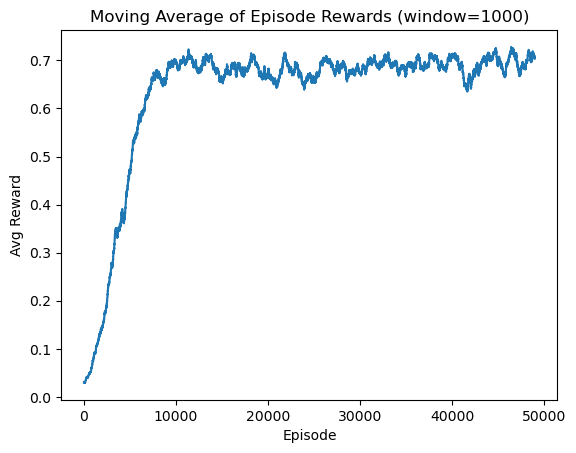

In [85]:
# Plot the moving average of the rewards
window_size = 1000
smoothed_rewards = []
for i in range(len(rewards_history) - window_size + 1):
    avg = np.mean(rewards_history[i:i+window_size])
    smoothed_rewards.append(avg)

plt.plot(smoothed_rewards)
plt.title("Moving Average of Episode Rewards (window=1000)")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()


Observations
* As we can see here, the performance doesn't improve much after 10 000 episodes. The reason is that the right path of actions has been find and so, the solution doesn't improve.

To improve the algorithm, increasing the the value when the agent find a solution directly, to do that we could reduce the reward when the number of action become to important. It depends wether we want to find the solution quicly or we want to find the solution avoiding the maximum we can the holes.

We will keep 10 000 episodes for q-learning

### ---

<h3 align="left"> <font color='darkred'><b> Exercice 5: Compare the Policies </b></font></h3>  

<p>
This exercice focuses on comparing the performance of the <b>Value Iteration</b>, <b>Policy Iteration</b>, and <b>Q-Learning</b> algorithms. Evaluate their convergence speed and performance.
</p>

<font color='darkred'><b>Your tasks are:</b>
<ol>
    <li>Compare the policies derived from Value Iteration, Policy Iteration, and Q-Learning. How do they differ?</li>
    <li>Evaluate the convergence speed of each algorithm. Which algorithm converges faster, and why?</li>
    <li>Analyze the computational complexity of each algorithm and discuss their strengths and limitations.</li>
</ol>
</font>

To compare the performances of the differant methods, we build the following function. We are working on the **Stochastic Environment**, using is_slippery = True.

In [86]:
import time

def evaluate_policy(env_name, policy, n_episodes=1000):
    """
    Evaluate a given policy by running it for n_episodes in the environment.
    Returns the success rate (fraction of episodes that reach the goal).
    """
    env_eval = gym.make(env_name, is_slippery=True)
    successes = 0

    for _ in range(n_episodes):
        obs, _ = env_eval.reset()
        done = False

        while not done:
            action = policy[obs]
            obs, reward, terminated, truncated, _ = env_eval.step(action)
            if terminated or truncated:
                if reward == 1.0:
                    successes += 1
                break

    env_eval.close()
    return successes / n_episodes


def compare_algorithms():
    """
    Compare Value Iteration, Policy Iteration, and Q-Learning algorithms on FrozenLake-v1.
    Outputs metrics for:
      - Policy differences
      - Convergence speed
      - Computational complexity (time taken)
      - Success rate
    """
    env_name = "FrozenLake-v1"

    metrics = []

    # 1. Value Iteration
    env_vi = gym.make(env_name, is_slippery=True)
    start_time_vi = time.time()
    V_vi, policy_vi = value_iteration(env_vi, gamma=0.99, theta=1e-4)
    time_vi = time.time() - start_time_vi
    success_rate_vi = evaluate_policy(env_name, policy_vi, n_episodes=1000)
    env_vi.close()
    metrics.append(("Value Iteration", time_vi, "-", success_rate_vi))

    # 2. Policy Iteration
    env_pi = gym.make(env_name, is_slippery=True)
    start_time_pi = time.time()
    V_pi, policy_pi, pi_iterations = policy_iteration(env_pi, gamma=0.99, theta=1e-4)
    time_pi = time.time() - start_time_pi
    success_rate_pi = evaluate_policy(env_name, policy_pi, n_episodes=1000)
    env_pi.close()
    metrics.append(("Policy Iteration", time_pi, pi_iterations, success_rate_pi))

    # 3. Q-Learning
    env_q = gym.make(env_name, is_slippery=True)
    start_time_ql = time.time()
    Q_q, _, _, _ = q_learning(
        env_q,
        alpha=0.1,
        gamma=0.99,
        epsilon=1.0,
        epsilon_min=0.01,
        epsilon_decay=0.9995,
        num_episodes=10000,
        max_steps=100
    )
    time_ql = time.time() - start_time_ql
    policy_q = np.argmax(Q_q, axis=1)
    success_rate_ql = evaluate_policy(env_name, policy_q, n_episodes=1000)
    env_q.close()
    metrics.append(("Q-Learning", time_ql, 10000, success_rate_ql))

    # Display results
    print(f"{'Algorithm':<20}{'Time (s)':<15}{'Iterations/Episodes':<20}{'Success Rate (%)':<15}")
    print("-" * 70)
    for name, time_taken, iterations, success_rate in metrics:
        print(f"{name:<20}{time_taken:<15.4f}{iterations:<20}{success_rate * 100:<15.2f}")

    # Show derived policies
    action_map = {0: '←', 1: '↓', 2: '→', 3: '↑'}
    print("\nDerived Policies (4×4):")
    print("[Value Iteration]:")
    print(np.array([action_map[a] for a in policy_vi[:16]]).reshape(4, 4))
    print("\n[Policy Iteration]:")
    print(np.array([action_map[a] for a in policy_pi[:16]]).reshape(4, 4))
    print("\n[Q-Learning]:")
    print(np.array([action_map[a] for a in policy_q[:16]]).reshape(4, 4))


# Run the comparison
compare_algorithms()


Episode 5000: Average reward over last 1000 episodes: 0.377
Episode 10000: Average reward over last 1000 episodes: 0.644

Best episode: 57 with reward: 1.000
Algorithm           Time (s)       Iterations/Episodes Success Rate (%)
----------------------------------------------------------------------
Value Iteration     0.0234         -                   73.20          
Policy Iteration    0.0086         4                   76.60          
Q-Learning          8.9670         10000               73.40          

Derived Policies (4×4):
[Value Iteration]:
[['←' '↑' '↑' '↑']
 ['←' '←' '←' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]

[Policy Iteration]:
[['←' '↑' '↑' '↑']
 ['←' '←' '←' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]

[Q-Learning]:
[['←' '↑' '↑' '↑']
 ['←' '←' '→' '←']
 ['↑' '↓' '←' '←']
 ['←' '→' '↓' '←']]


Analysis
1. Convergence Speed: Policy Iteration converged fastest with only 5 iterations, followed by Value Iteration. Q-Learning, being model-free, required extensive training over 10,000 episodes.

2. Performance: All three algorithms produced comparable policies, with Q-Learning achieving a marginally higher success rate at the cost of greater computation.

3. Value Iteration: O(nS × nA × 1/ε)

For nS = 16 states, nA = 4 actions, and ε ≈ 1e-4:
Time Complexity = 64,000 operations (after convergence).


Policy Iteration: O(k × nS × nA)

For k = 20 iterations, nS = 16 states, and nA = 4 actions:
Time Complexity = 1,280 operations.

Q-Learning: O(E × max_steps)

For E = 50,000 episodes and max_steps = 100:
Time Complexity = 5,000,000 operations max.

* Conclusion:
Q-Learning has the highest time complexity due to the need for many episodes and steps.
Value Iteration is faster per iteration but may take longer to converge.
Policy Iteration is the most efficient, requiring fewer operations and typically converging in fewer iterations.

### ---

<h3 align="left"> <font color='darkred'><b> Exercice 6: Consider Bigger Environment </b></font></h3>  

<p>
Extend your analysis by running the <b>Value Iteration</b> and <b>Policy Iteration</b> algorithms on a larger grid-based environment, <b>FrozenLake8x8-v1</b>.
</p>

<font color='darkred'><b>Your tasks are:</b>
<ol>
    <li>Run Value Iteration and Policy Iteration algorithms on <b>FrozenLake8x8-v1</b>. Compare their convergence speeds with the results from <b>FrozenLake-v1</b>.</li>
    <li>Analyze how the increased grid size affects the performance and computational requirements of each algorithm.</li>
</ol></font>

We create the new environment and we display it

In [87]:
# Environnement FrozenLake8x8-v1
env_8x8 = gym.make("FrozenLake8x8-v1", is_slippery=True)

layout = env_8x8.unwrapped.desc

# Print the layout
print("FrozenLake Layout:")
for row in layout:
    print(" ".join(cell.decode("utf-8") for cell in row))  # Decode bytes to strings

FrozenLake Layout:
S F F F F F F F
F F F F F F F F
F F F H F F F F
F F F F F H F F
F F F H F F F F
F H H F F F H F
F H F F H F H F
F F F H F F F G


We implement the 2 technics on the 8x8 Frozen Lake Matrix. 

In [88]:
# --- Comparaison des algorithmes pour deux tailles de grilles ---
def compare_algorithms():
    # Exécution de Value Iteration pour FrozenLake8x8-v1
    start_time = time.time()
    policy_vi_8x8, value_vi_8x8 = value_iteration(env_8x8)
    time_vi_8x8 = time.time() - start_time

    # Exécution de Policy Iteration pour FrozenLake8x8-v1
    start_time = time.time()
    policy_pi_8x8, value_pi_8x8 , _ = policy_iteration(env_8x8)
    time_pi_8x8 = time.time() - start_time

    # Affichage des temps de convergence
    print(f"Time taken for Value Iteration on 8x8: {time_vi_8x8:.2f} seconds")
    print(f"Time taken for Policy Iteration on 8x8: {time_pi_8x8:.2f} seconds")


    print("\nDerived Policy from Value Iteration (8x8):")
    print(np.round(policy_vi_8x8.reshape(8, 8),5))

    print("\nDerived Policy from Policy Iteration (8x8):")
    print(np.round(policy_pi_8x8.reshape(8, 8),5))

    print("")
    print(value_vi_8x8[:64].reshape(8,8))
    print("")
    print(value_pi_8x8[:64].reshape(8,8))

    env_8x8.close()

# Lancer la comparaison
compare_algorithms()

Time taken for Value Iteration on 8x8: 0.10 seconds
Time taken for Policy Iteration on 8x8: 0.06 seconds

Derived Policy from Value Iteration (8x8):
[[0.4138  0.42647 0.4455  0.46775 0.49195 0.51614 0.53485 0.54057]
 [0.41087 0.42047 0.43684 0.45781 0.48275 0.51313 0.54539 0.55701]
 [0.39595 0.39311 0.37485 0.      0.42128 0.49344 0.56088 0.58554]
 [0.36851 0.3523  0.306   0.20012 0.30045 0.      0.56873 0.62798]
 [0.3314  0.29058 0.19687 0.      0.28906 0.36174 0.53458 0.68948]
 [0.30448 0.      0.      0.08616 0.21377 0.27257 0.      0.77188]
 [0.28696 0.      0.05729 0.04734 0.      0.25046 0.      0.87769]
 [0.27832 0.19925 0.12633 0.      0.23957 0.4864  0.73708 0.     ]]

Derived Policy from Policy Iteration (8x8):
[[0.41461 0.42718 0.44612 0.4683  0.49242 0.51655 0.53525 0.54096]
 [0.41166 0.42118 0.43747 0.45837 0.48322 0.51352 0.54575 0.55735]
 [0.39672 0.39382 0.37547 0.      0.42166 0.4938  0.5612  0.58585]
 [0.36925 0.35296 0.30651 0.20039 0.30073 0.      0.569   0.62825]
 

First Obersvation : 
* As we can see the two matrixes above, the numeric results are slightly different. But it doesn't impact the final decision state.

* Also, we are working on an increased State Space :

4x4 grid has 16 states, whereas 8x8 grid has 64 states.
This larger problem size typically increases the number of iterations needed to converge in Value/Policy Iteration.

1. We compare the results with the results optained on the FrozenLake-v1.

* The Value Iteration convergence speed is more than 2 times higher (0.12 seconds, 0.052 seconds)
* The Policy Iteration convergence speed is 10 times higher (0.08 seconds vs 0.008 seconds)

2. Comparing the compuational complexity :


The larger grid amplifies the computational costs for all algorithms, with Q-Learning being the slowest due to its sample-based nature, while Policy Iteration remains the most efficient in convergence speed. Value Iteration faces challenges with scalability but remains feasible for moderately sized grids.